In [7]:
import pyarrow.parquet as pq
import numpy as np
from scipy import sparse 
import os
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
import get_files

In [14]:
path = './'
channel = 0

In [3]:
nodes_unique = get_files.get_communication_unique(channel=channel)

Loading already computed.


In [15]:
filename = f'communication_unique_{channel}.npy'
        
filepath = os.path.join(path, filename)

if os.path.exists(filepath):
    print('Loading already computed.')
    nodes_unique = np.fromfile(filepath, dtype=np.int64)

Loading already computed.


In [17]:
nodes_unique.shape

(100000,)

In [5]:
# communication_indices= get_files.communication_indices = get_communication_indices()
# source_communication = get_files.get_source_communication(communication_indices=communication_indices)
# target_communication = get_files.get_target_communication(communication_indices=communication_indices)
# nodes_unique = get_files.get_communication_unique(source_communication, target_communication)
# source_communication_index = get_files.get_source_communication_matrix_index(channel=channel)
# target_communication_index = get_files.get_target_communication_matrix_index(channel=channel)

In [4]:
coo_matrix = get_files.get_communication_matrix(channel=channel)

Loading already computed matrix for channel 0.


In [5]:
mat_csr = coo_matrix.tocsr() 
nc = csgraph.connected_components(csgraph=mat_csr, directed=True, return_labels=False)
print(f'connected components {nc}')


connected components 1


In [14]:
np.diff(mat_csr[0:].indptr)

array([212, 903, 627, ..., 217, 228, 160], dtype=int32)

In [8]:
reorder = csgraph.reverse_cuthill_mckee(mat_csr)

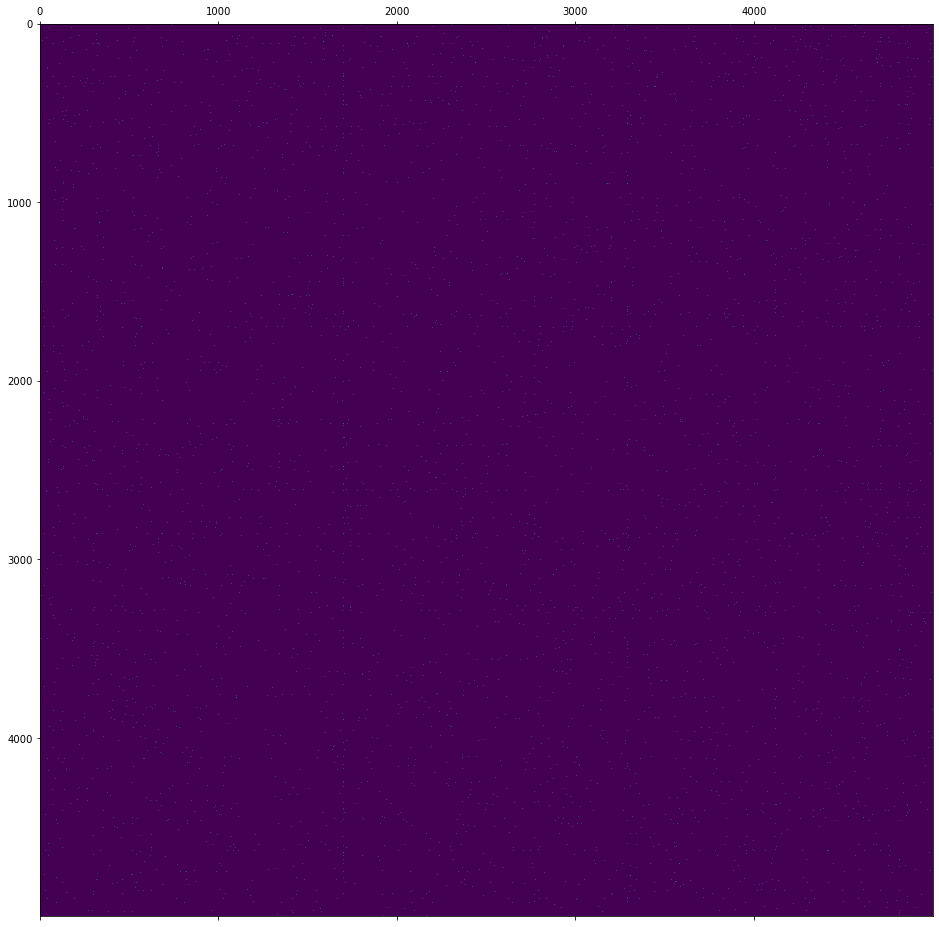

<Figure size 1152x1152 with 0 Axes>

In [7]:
plt.figure(figsize=(16,16))
sb = 0
sn = 5000
se = sb + sn 
# mask = reorder[sb:se]
plt.figure(figsize=(16,16))
plt.matshow(mat_csr[sb:se, sb:se].todense(), fignum=1)

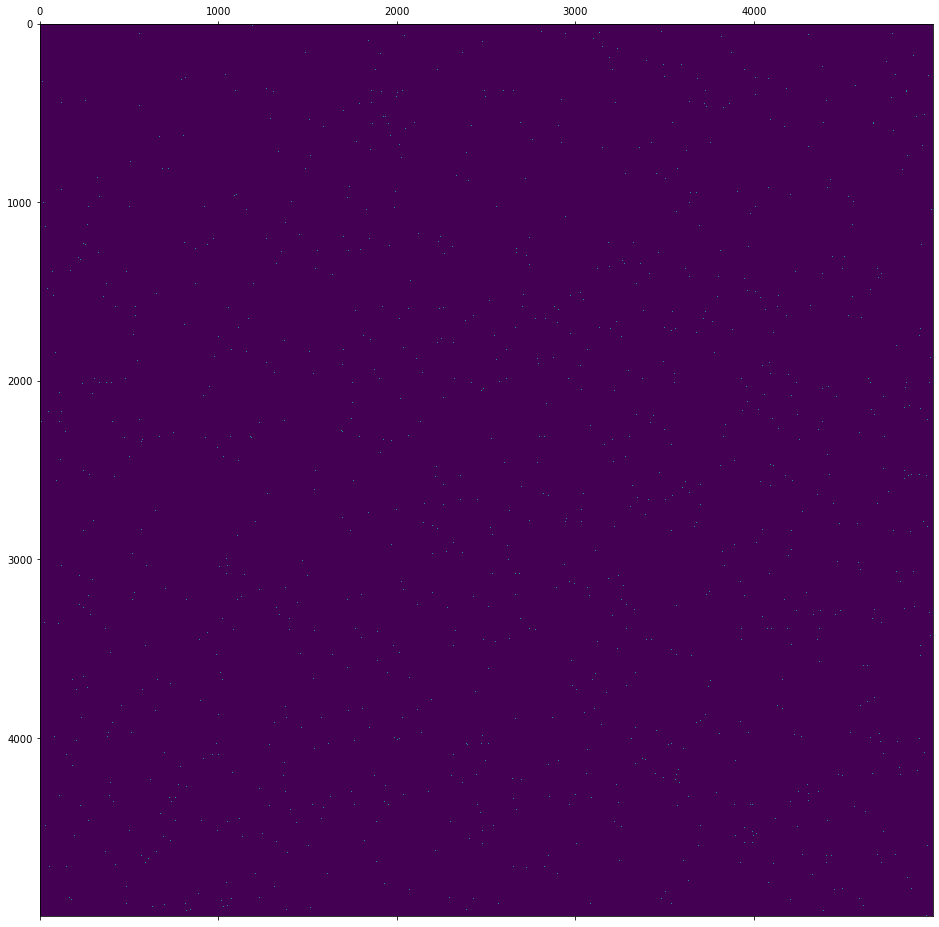

In [9]:
plt.figure(figsize=(16,16))
plt.matshow(mat_csr[reorder[0:5000],:][:,reorder[0:5000]].todense(), fignum=1)

In [80]:
mat_csr += mat_csr.getH()
L = csgraph.laplacian(mat_csr, normed=False)
e, v = sparse.linalg.eigsh(L.astype(float), k=2, which="SM")
reorder_spec = np.argsort(v[:,0])

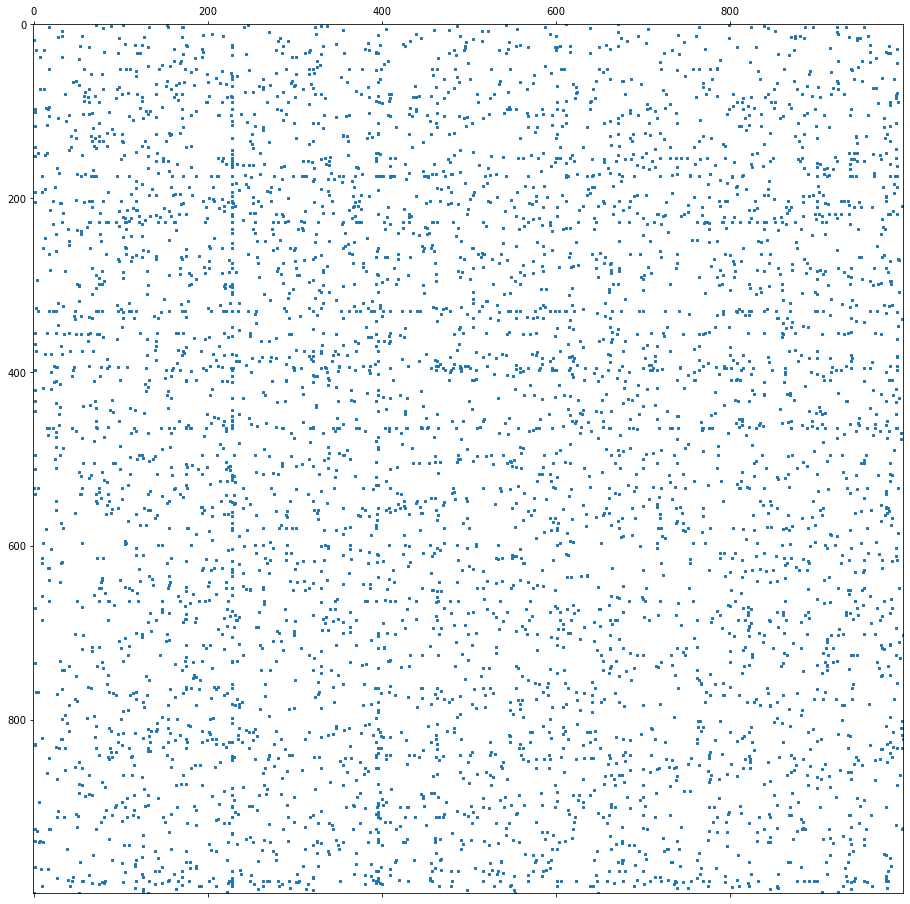

In [6]:
plt.figure(figsize=(16,16))
sb = 0
sn = 1000
se = sb + sn 
plt.spy(mat_csr[sb:se,sb:se], markersize=2)

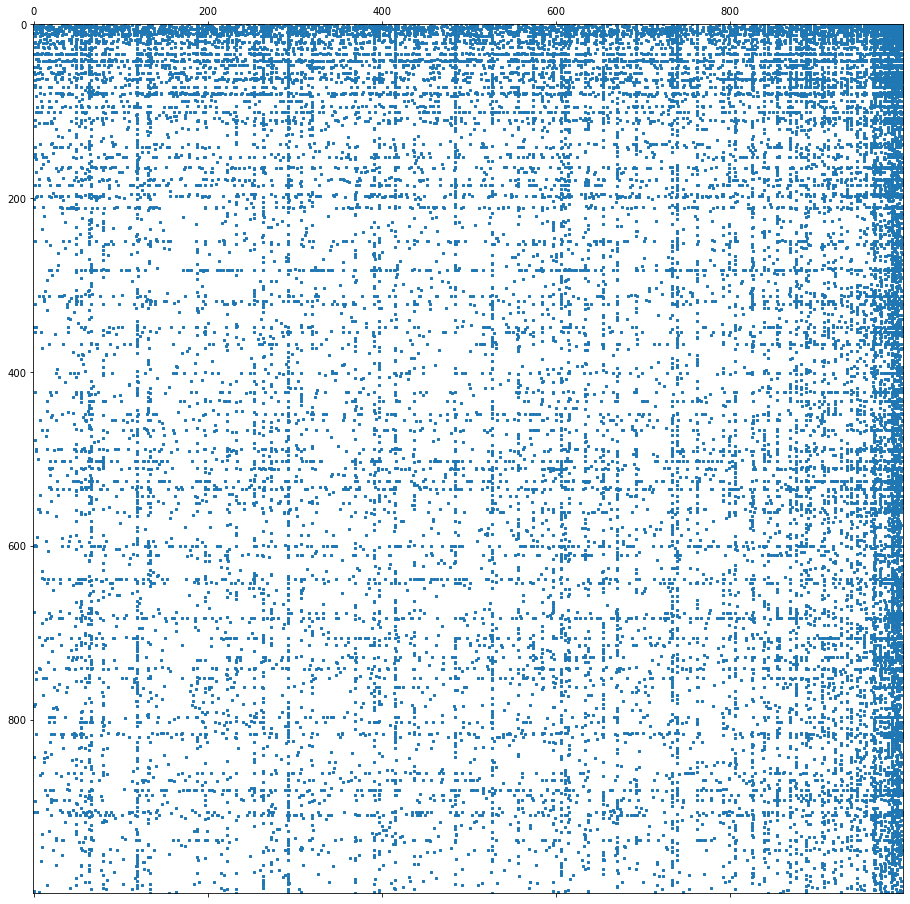

In [175]:
plt.figure(figsize=(16,16))
mask = av[sb:sn]
plt.spy(mat_csr[mask,][:,av[-sn:]], markersize=2)

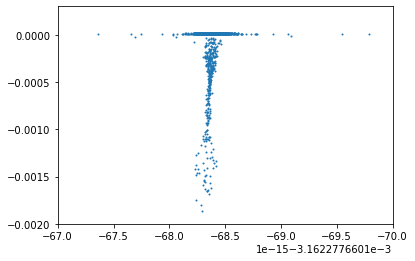

In [139]:
ax1 = plt.subplot(111)
ax1.scatter(v[:,0], v[:,1],s=1)
plt.show()

In [209]:
from scipy.spatial import distance
distance.jaccard([2, 1, 0], [0, 2, 0])


1.0